# Intro
Name:  

    ASR_2019_Proposal_MPL_SASZe

Purpose:  

    Make some figures to be put into the proposal, showing MPL data of aerosol over clouds, and examples of SASZe data. 
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - Sp_parameters.py : for Sp class definition, and for defining the functions used to build parameters
    - matplotlib
    - mpltools
    - numpy
    - scipy : for saving and reading
    - plotting_utils (user defined plotting routines)
    - hdf5storage
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - ARM netcdf files for MPL and SASZe
  
 Modification History:
 
     Written: by Samuel LeBlanc, Halfway to Tahoe, 2019-03-08

# Load the python modules and setup paths

In [1]:
import numpy as np
import hdf5storage as hs
import os
import write_utils as wu
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
import load_utils as lu
from path_utils import getpath

In [3]:
%matplotlib notebook

In [4]:
import scipy.stats as st
import Sun_utils as su
import plotting_utils as pu

In [5]:
import Sp_parameters as sp

In [6]:
fp = getpath('LASIC')
fp

Return path named:  LASIC /mnt/c/Users/sleblanc/Research/LASIC/


u'/mnt/c/Users/sleblanc/Research/LASIC/'

# Load the files

## Load the MPL files

In [7]:
daystr = '20160814'

In [9]:
ff = fp+'data/MPL/asi30smplcmask1zwangM1.c1.{}.00000?.cdf'.format(daystr)

In [8]:
fl = os.listdir(fp+'data/MPL/')

In [9]:
for i,f in enumerate(fl):
    if daystr in f:
        fo = f

In [10]:
fo

u'asi30smplcmask1zwangM1.c1.20160814.000001.cdf'

In [11]:
mpl,mplh = lu.load_netcdf(fp+'data/MPL/'+fo,everything=True)

Reading file: /mnt/c/Users/sleblanc/Research/LASIC/data/MPL/asi30smplcmask1zwangM1.c1.20160814.000001.cdf
Outputting the Data subdatasets:
0: base_time
1: time_offset
2: time
3: height
4: cloud_base
5: cloud_top
6: num_cloud_layers
7: linear_depol_ratio
8: qc_linear_depol_ratio
9: linear_depol_snr
10: qc_linear_depol_snr
11: cloud_mask
12: qc_cloud_mask
13: cloud_base_layer
14: cloud_top_layer
15: backscatter
16: qc_backscatter
17: backscatter_snr
18: qc_backscatter_snr
19: background_signal
20: cloud_top_attenuation_flag
21: shots_summed
22: deadtime_correction_counts
23: deadtime_correction
24: afterpulse_correction
25: overlap_correction
26: lat
27: lon
28: alt
['base_time', 'cloud_top_layer', 'num_cloud_layers', 'linear_depol_snr', 'height', 'lat', 'qc_linear_depol_ratio', 'qc_backscatter', 'qc_cloud_mask', 'afterpulse_correction', 'alt', 'background_signal', 'cloud_top', 'lon', 'cloud_top_attenuation_flag', 'backscatter', 'qc_backscatter_snr', 'linear_depol_ratio', 'backscatter_sn

In [14]:
mplh['qc_backscatter']

<type 'netCDF4._netCDF4.Variable'>
int32 qc_backscatter(time, height)
    long_name: Quality check results on field: Total attenuated backscatter
    units: unitless
    description: This field contains bit packed integer values, where each bit represents a QC test on the data. Non-zero bits indicate the QC condition given in the description for those bits; a value of 0 (no bits set) indicates the data has not failed any QC tests.
    flag_method: bit
    bit_1_description: The value of backscatter is not finite, data value set to missing_value in output file.
    bit_1_assessment: Bad
unlimited dimensions: time
current shape = (2880, 667)
filling off

In [15]:
mplh['backscatter']

<type 'netCDF4._netCDF4.Variable'>
float32 backscatter(time, height)
    long_name: Total attenuated backscatter
    units: counts/microsecond
    missing_value: -9999.0
    comment: background subtracted, overlap, energy and dead-time corrected
    calculation: ((copol+(2*crosspol))*overlap)/energy
    data_quality_comment: Data quality ok for both cloud and aerosol analysis
    normalization_factor: N/A
    backscatter_data_quality_comment: Data quality ok for both cloud and aerosol analysis
    ancillary_variables: qc_backscatter
unlimited dimensions: time
current shape = (2880, 667)
filling off

In [16]:
mplh['background_signal']

<type 'netCDF4._netCDF4.Variable'>
float32 background_signal(time)
    long_name: Background signal
    units: counts/microsecond
    missing_value: -9999.0
    comment: sum of co-polarized and cross polarized signals from input source
unlimited dimensions: time
current shape = (2880,)
filling off

In [20]:
mplh['time']

<type 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time offset from midnight
    units: seconds since 2016-08-14 00:00:00 0:00
unlimited dimensions: time
current shape = (2880,)
filling off

In [23]:
mplh['height']

<type 'netCDF4._netCDF4.Variable'>
float32 height(height)
    long_name: Vertical height above ground level (AGL) corresponding to the bottom of height bin
    units: km
unlimited dimensions: 
current shape = (667,)
filling off

## Load the SASZe data

In [158]:
fs = os.listdir(fp+'data/SASZe/')

In [159]:
for i,f in enumerate(fs):
    if daystr in f:
        if 'vis' in f:
            fgv = f
        if 'nir' in f:
            fgn = f

In [160]:
vis,vish = lu.load_netcdf(fp+'data/SASZe/'+fgv,everything=True)

Reading file: /mnt/c/Users/sleblanc/Research/LASIC/data/SASZe/asisaszevisM1.a1.20160814.054718.cdf
Outputting the Data subdatasets:
0: base_time
1: time_offset
2: time
3: wavelength
4: mio_temperature_mems
5: mio_temperature_mems_fahr
6: mio_temperature_trh
7: mio_rh
8: collector_temperature
9: collector_rh
10: collector_dewpoint
11: chiller_temperature
12: chiller_rh
13: chiller_dewpoint
14: collector_x_tilt
15: collector_y_tilt
16: collector_x_tilt_std
17: collector_y_tilt_std
18: band_azimuth
19: solar_azimuth
20: solar_zenith
21: inner_band_angle
22: inner_band_scattering_angle
23: clock_ticks
24: bench_temperature
25: ad_temperature
26: integration_time
27: number_of_scans
28: responsivity
29: zenith_radiance
30: lat
31: lon
32: alt
['chiller_rh', 'collector_y_tilt_std', 'base_time', 'mio_rh', 'mio_temperature_mems_fahr', 'number_of_scans', 'solar_zenith', 'zenith_radiance', 'wavelength', 'alt', 'ad_temperature', 'mio_temperature_mems', 'lon', 'chiller_dewpoint', 'bench_temperatur

In [162]:
vish['zenith_radiance']

<type 'netCDF4._netCDF4.Variable'>
float32 zenith_radiance(time, wavelength)
    long_name: Spectral zenith radiance from Si VIS spectrometer
    units: W/(m^2 um sr)
    valid_min: 0.0
    missing_value: -9999.0
unlimited dimensions: time
current shape = (39204, 2048)
filling off

In [165]:
vish['wavelength']

<type 'netCDF4._netCDF4.Variable'>
float32 wavelength(wavelength)
    long_name: Wavelength of VIS spectrometer pixels
    units: nm
unlimited dimensions: 
current shape = (2048,)
filling off

In [163]:
vish['time']

<type 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time offset from midnight
    units: seconds since 2016-08-14 00:00:00 0:00
unlimited dimensions: time
current shape = (39204,)
filling off

In [161]:
nir,nirh = lu.load_netcdf(fp+'data/SASZe/'+fgn,everything=True)

Reading file: /mnt/c/Users/sleblanc/Research/LASIC/data/SASZe/asisaszenirM1.a1.20160814.054718.cdf
Outputting the Data subdatasets:
0: base_time
1: time_offset
2: time
3: wavelength
4: mio_temperature_mems
5: mio_temperature_mems_fahr
6: mio_temperature_trh
7: mio_rh
8: collector_temperature
9: collector_rh
10: collector_dewpoint
11: chiller_temperature
12: chiller_rh
13: chiller_dewpoint
14: collector_x_tilt
15: collector_y_tilt
16: collector_x_tilt_std
17: collector_y_tilt_std
18: band_azimuth
19: solar_azimuth
20: solar_zenith
21: inner_band_angle
22: inner_band_scattering_angle
23: clock_ticks
24: bench_temperature
25: ad_temperature
26: integration_time
27: number_of_scans
28: responsivity
29: zenith_radiance
30: lat
31: lon
32: alt
['chiller_rh', 'collector_y_tilt_std', 'base_time', 'mio_rh', 'mio_temperature_mems_fahr', 'number_of_scans', 'solar_zenith', 'zenith_radiance', 'wavelength', 'alt', 'ad_temperature', 'mio_temperature_mems', 'lon', 'chiller_dewpoint', 'bench_temperatur

In [166]:
nirh['zenith_radiance']

<type 'netCDF4._netCDF4.Variable'>
float32 zenith_radiance(time, wavelength)
    long_name: Spectral zenith radiance from InGaAs NIR spectrometer
    units: W/(m^2 um sr)
    valid_min: 0.0
    missing_value: -9999.0
unlimited dimensions: time
current shape = (39204, 256)
filling off

### Build the full spectra from vis and nir

In [243]:
vis['wavelength'][100:1200]

array([ 334.15628052,  334.75036621,  335.34442139, ...,  966.35229492,
        966.90667725,  967.4609375 ], dtype=float32)

In [244]:
nir['wavelength'][15:]

array([  950.60076904,   954.48168945,   958.36004639,   962.23571777,
         966.10882568,   969.97930908,   973.84710693,   977.71234131,
         981.57495117,   985.43487549,   989.29223633,   993.14691162,
         996.9989624 ,  1000.84838867,  1004.69512939,  1008.53924561,
        1012.3807373 ,  1016.21954346,  1020.0557251 ,  1023.88922119,
        1027.72009277,  1031.54821777,  1035.3737793 ,  1039.1965332 ,
        1043.01672363,  1046.83422852,  1050.64904785,  1054.46130371,
        1058.27075195,  1062.07751465,  1065.8815918 ,  1069.6829834 ,
        1073.48168945,  1077.27770996,  1081.07104492,  1084.86169434,
        1088.6496582 ,  1092.43481445,  1096.21728516,  1099.99707031,
        1103.77416992,  1107.54858398,  1111.32019043,  1115.08911133,
        1118.85534668,  1122.61877441,  1126.3795166 ,  1130.13757324,
        1133.89282227,  1137.64526367,  1141.3951416 ,  1145.14221191,
        1148.88647461,  1152.62805176,  1156.36682129,  1160.10290527,
      

In [286]:
rad = np.append(vis['zenith_radiance'][:,100:1200],nir['zenith_radiance'][:,15:]*2.0,axis=1)
wvl = np.append(vis['wavelength'][100:1200],nir['wavelength'][15:])

In [223]:
wvl.shape

(1251,)

In [224]:
rad.shape

(39204, 1251)

In [287]:
s = {'zenlambda':wvl,'rad':rad,'utc':vis['time']/3600.0,'good':np.where(vis['solar_zenith']<70.0)[0]}

In [288]:
sr = sp.Sp(s)

1341 1341
in rad
(39204, 1341) 2 1341
1 in ui
(39204, 1341)
Calculating the utc times
Not possible to get datestr, returning empty


## Load the LUT for zenith spectra from ORACLES

In [255]:
fpo = getpath('ORACLES')

In [256]:
fpo

u'/mnt/c/Users/sleblanc/Research/ORACLES/'

In [263]:
model = hs.loadmat(fpo+'model/v3_ORACLES_lut.mat')

In [259]:
model.keys()

[u'tau',
 u'rad',
 u'sza',
 u'irr_dn_diff',
 u'irr_dn',
 u'zout',
 u'wvl',
 u'phase',
 u'ref',
 u'irr_up']

In [267]:
1.0/np.cos(model['sza']*np.pi/180.0)

array([ 1.05146222,  1.25213566,  1.43955654,  1.66164014,  1.83607846,
        2.06266534,  2.28117203,  2.45859334,  2.66946716,  2.79042811,
        3.07155349,  3.23606798,  3.42030362,  3.62795528,  3.86370331])

In [270]:
sptemp = {}
sptemp['tau'] = model['tau']
sptemp['ref'] = model['ref']
sptemp['zout'] = model['zout']
sptemp['sza'] = model['sza']
sptemp['phase'] = model['phase']
sptemp['irr_dn_diff'] = model['irr_dn_diff'][:,:,:,:,:,1]
sptemp['irr_dn'] = model['irr_dn'][:,:,:,:,:,1]
sptemp['irr_up'] = model['irr_up'][:,:,:,:,:,1]
sptemp['wvl'] = [model['wvl']]
sptemp['rad'] = model['rad'][:,:,:,:,:,1]

In [271]:
lut = sp.Sp(sptemp)

1302 1302
in rad
(2, 1302, 3, 35, 27) 5 1302
1 in ui
(2, 1302, 3, 35, 27)


In [319]:
lut.tau

array([   0.1 ,    0.2 ,    0.5 ,    0.75,    1.  ,    1.5 ,    2.  ,
          3.  ,    4.  ,    5.  ,    6.  ,    7.  ,    8.  ,    9.  ,
         10.  ,   12.5 ,   15.  ,   17.5 ,   20.  ,   25.  ,   30.  ,
         35.  ,   40.  ,   50.  ,   60.  ,   80.  ,  100.  ])

In [321]:
lut.ref,lut.ref.shape

(array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  17.,  19.,  21.,  23.,  25.,  27.,  29.,
         30.,  33.,  35.,  38.,  40.,  43.,  45.,  48.,  50.,  53.,  55.,
         58.,  60.]), (35,))

In [323]:
lut.norm[0,:,0,4,16]

array([ 0.78136252,  0.78499743,  0.78761795, ...,  0.07547952,
        0.07528804,  0.07512469])

# MPL plotting

In [35]:
mpl['backscatter'][0,:]

array([  7.30604219e+04,   6.40062617e+04,   1.89337363e+04,
         1.26560137e+04,   4.10417090e+03,   5.98314636e+02,
         1.36246386e+01,   6.22319818e-01,   2.91906208e-01,
         1.66459769e-01,   8.65690634e-02,   1.09037012e-01,
         5.67880720e-02,   5.54059632e-02,   6.76238015e-02,
         2.88492907e-02,   3.44882123e-02,   2.41183732e-02,
         2.97655594e-02,   2.50547696e-02,   2.60424800e-02,
         2.00848654e-02,   1.96335390e-02,   9.87983402e-03,
         7.67090637e-03,   6.82688411e-03,   7.75482599e-03,
         1.04545262e-02,   1.37482043e-02,   1.19975368e-02,
         6.19705813e-03,   7.85941631e-03,   6.27254788e-03,
         3.27912229e-03,   7.73863867e-03,   6.62449561e-03,
         5.51594421e-03,   5.08598285e-03,   4.64793947e-03,
         4.23988653e-03,   6.83546951e-03,   4.60136821e-03,
         3.81059153e-03,   2.23711831e-03,   4.77301981e-03,
         2.89309304e-03,   3.55084916e-03,   2.33678496e-03,
         2.80717295e-03,

In [12]:
bsc = mpl['backscatter'].T
bsc[bsc <0.005] = np.nan
bsc[bsc >10.005] = np.nan


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
ib = np.where(mpl['cloud_base']>0)[0]
iafter = np.append(ib[np.where(np.diff(ib,1)>1)[0]]+1,ib[-1]+1)
ibefore = np.append(ib[0]-1,ib[np.where(np.diff(ib,1)>1)[0]+1]-1)


In [14]:
len(iafter),len(ibefore)

(137, 137)

In [140]:
ib

array([ 149,  161,  162,  163,  164,  165,  166,  167,  168,  169,  184,
        185,  372,  373,  374,  375,  376,  377,  378,  381,  384,  545,
        546,  547,  548,  549,  568,  569,  570,  571,  572,  573,  574,
        575,  576,  588,  589,  590,  591,  592,  593,  594,  595,  596,
        597,  599,  600,  601,  602,  603,  604,  616,  617,  618,  619,
        620,  666,  667,  668,  669,  674,  675,  676,  677,  702,  703,
        704,  705,  706,  707,  708,  709,  710,  711,  765,  766,  767,
        768,  769,  770,  789,  790,  791,  792,  793,  794,  795,  796,
        797,  829,  830,  831,  832,  833,  841,  842,  843,  844,  845,
        846,  851,  874,  875,  876,  886,  896,  897,  898,  899,  900,
        901,  902,  921,  923,  924,  925,  926,  927,  929,  931,  932,
        933,  934,  956,  966,  967,  968,  969,  970,  971,  972,  981,
        986,  990,  994,  995, 1006, 1010, 1011, 1012, 1013, 1014, 1015,
       1019, 1021, 1022, 1023, 1024, 1025, 1027, 10

In [150]:
mpl['time'][iafter]/3600.0

array([  1.25027778,   1.41694444,   1.55027778,   3.15833333,
         3.18361111,   3.20861111,   4.58361111,   4.80833333,
         4.98361111,   5.04166667,   5.175     ,   5.58333333,
         5.65027778,   5.93333333,   6.425     ,   6.65      ,
         6.95      ,   7.05833333,   7.1       ,   7.30833333,
         7.39166667,   7.525     ,   7.68333333,   7.73333333,
         7.75      ,   7.79166667,   7.975     ,   8.10833333,
         8.18333333,   8.225     ,   8.25833333,   8.3       ,
         8.39166667,   8.46666667,   8.5       ,   8.55      ,
         8.6       ,   8.70833333,   8.84166667,   8.91666667,
         9.        ,   9.08333333,   9.14166667,   9.24166667,
         9.29166667,   9.375     ,   9.6       ,   9.68333333,
         9.76666667,   9.95833333,  10.175     ,  10.2       ,
        10.25833333,  10.28333333,  10.49166667,  10.59166667,
        10.73333333,  10.78333333,  10.8       ,  10.83333333,
        10.95      ,  11.04166667,  11.54166667,  11.57

In [ ]:
bsc

In [99]:
bsc.shape

(667, 2880)

In [105]:
mpl['height'][70]

2.1210308

In [129]:
x

array([False, False, False, ..., False, False, False], dtype=bool)

<IPython.core.display.Javascript object>


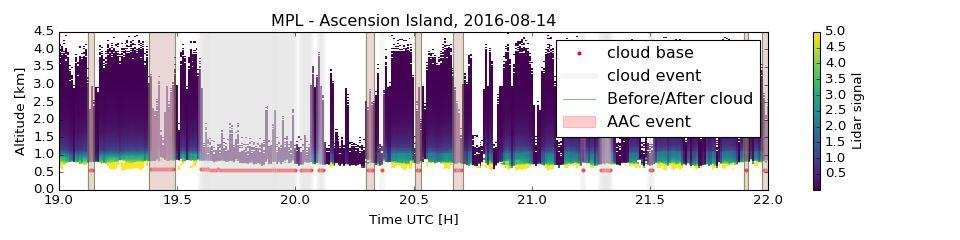

In [15]:
#plt.figure()
fig,ax = plt.subplots(1,1,figsize=(12,3))
pc = ax.pcolorfast(mpl['time']/3600.0,mpl['height'],bsc[:-1,:-1],vmax=5.0,vmin=0.0005,cmap='viridis')
ax.plot(mpl['time']/3600.0,mpl['cloud_base'],'.r',label='cloud base')
pre,post = [],[]
for x in np.where(mpl['cloud_base']>0)[0]:
    ax.axvline(mpl['time'][x]/3600.0,color='#DDDDDD',alpha=0.3,linewidth=5.0)
ax.axvline(x,color='#DDDDDD',alpha=0.3,linewidth=5.0,label='cloud event')

for i,y in enumerate(iafter):
    if bsc[70,ibefore[i]]>0.001 and bsc[70,y]>0.001:
        #print i,mpl['time'][ibefore[i]]/3600.0,mpl['time'][y]/3600.0
        ax.axvspan(mpl['time'][ibefore[i]]/3600.0,mpl['time'][y]/3600.0,color='r',alpha=0.2)
        ax.axvline(mpl['time'][ibefore[i]]/3600.0,color='g',alpha=0.5)
        ax.axvline(mpl['time'][y]/3600.0,color='g',alpha=0.5)
ax.axvspan(mpl['time'][ibefore[i]]/3600.0,mpl['time'][y]/3600.0,color='r',alpha=0.2,label='AAC event')
ax.axvline(mpl['time'][y]/3600.0,color='g',alpha=0.5,label='Before/After cloud')
#for x in mpl['time'][bsc[70,:]>0.1]/3600.0:
#     ax.axvline(x,color='r',alpha=0.05,linewidth=5.0)
#ax.axvline(x,color='r',alpha=0.05,linewidth=5.0,label='AAC event')


#ax.plot(mpl['time']/3600.0,mpl['cloud_top'],'.r',label='cloud top')

plt.legend(frameon=True,numpoints=1)
aa = plt.colorbar(pc)
#aa.set_label('Total attenuated backscatter\n[counts/microsecond]')
aa.set_label('Lidar signal')
ax.set_ylabel('Altitude [km]')
ax.set_xlabel('Time UTC [H]')
ax.set_xlim([19,22])
ax.set_ylim([0,4.5])
ax.set_title('MPL - Ascension Island, 2016-08-14')
plt.tight_layout()
plt.savefig(fp+'data/MPL_ASI_AAC_events.png',dpi=600,transparent=True)

# SASZe plotting

In [186]:
np.argmin(abs(sr.utc-19.45))

36947

In [208]:
np.argmin(abs(sr.utc-14.57))

23760

In [268]:
vis['solar_zenith'][23760]

31.789419

In [265]:
1.0/np.cos(vis['solar_zenith'][23760]*np.pi/180.0)

1.1764844409219981

<IPython.core.display.Javascript object>


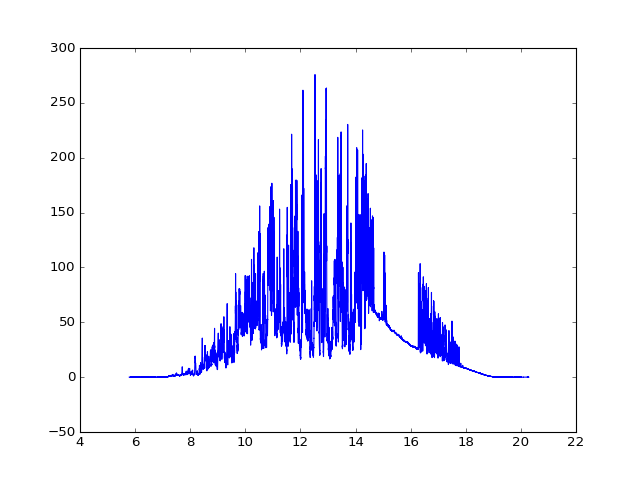

In [251]:
plt.figure()
plt.plot(sr.utc,sr.sp[:,400])

In [298]:
import matplotlib.ticker as ticker
from mpltools import color

In [304]:
def frmt(x,pos):
    return '{:5.2f}'.format(x)

In [310]:
len(range(23000,25000,50))

40

<IPython.core.display.Javascript object>


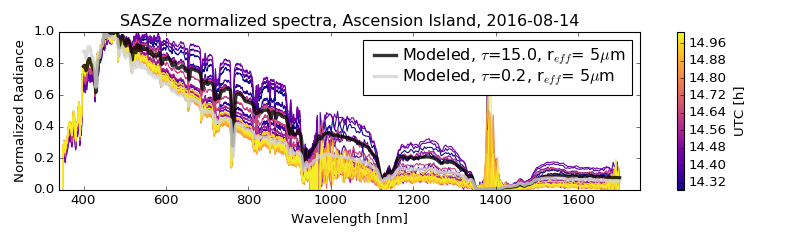

In [356]:
plt.figure(figsize=(10,3))
color.cycle_cmap(41,cmap=plt.cm.plasma,ax=plt.gca())
for j in xrange(23000,25000,50):
    plt.plot(sr.wvl,sr.norm[j,:])
scalarmap = plt.cm.ScalarMappable(cmap=plt.cm.plasma)
scalarmap.set_array(sr.utc[range(23000,25000,50)])
cba = plt.colorbar(scalarmap,format=ticker.FuncFormatter(frmt))
cba.set_label('UTC [h]')
plt.ylim(0,1)
plt.xlim(340,1750)
plt.title('SASZe normalized spectra, Ascension Island, 2016-08-14')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Normalized Radiance')
plt.tight_layout()
#plt.plot(lut.wvl,lut.norm[0,:,0,8,20],'k-',lw=3,
#         label='Modeled, $\\tau$={:2.1f}, r$_{{eff}}$={:2.0f}$\\mu$m'.format(lut.tau[20],lut.ref[8]))
plt.plot(lut.wvl,lut.norm[0,:,0,4,16],'-',color='k',lw=3,alpha=0.8,
         label='Modeled, $\\tau$={:2.1f}, r$_{{eff}}$={:2.0f}$\\mu$m'.format(lut.tau[16],lut.ref[4]))
plt.plot(lut.wvl,lut.norm[0,:,0,4,1],'-',color='lightgrey',lw=3,alpha=0.8,
         label='Modeled, $\\tau$={:2.1f}, r$_{{eff}}$={:2.0f}$\\mu$m'.format(lut.tau[1],lut.ref[4]))
plt.legend(handletextpad=0.08,labelspacing=0.05,frameon=True)
plt.savefig(fp+'data/SASZe_sample_spectra_with_model.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


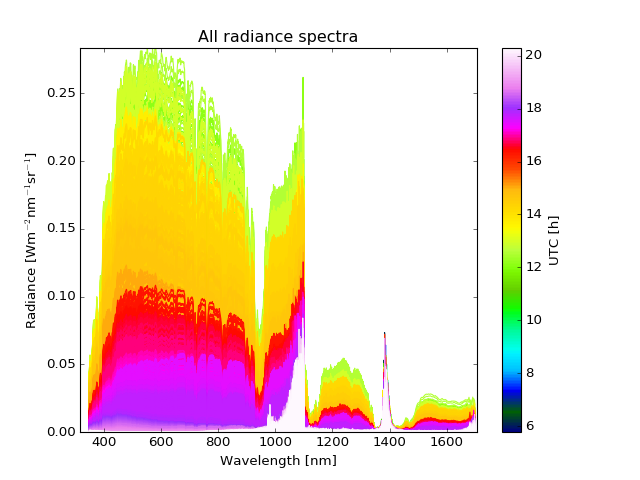

(0, 0.5)

In [184]:
fig = sp.plt_zenrad(sr)
plt.ylim(0,0.5)
#plt.figure()


<IPython.core.display.Javascript object>


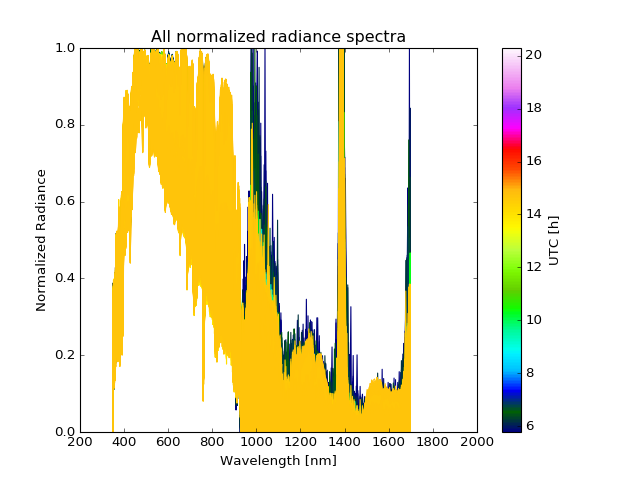

<IPython.core.display.Javascript object>


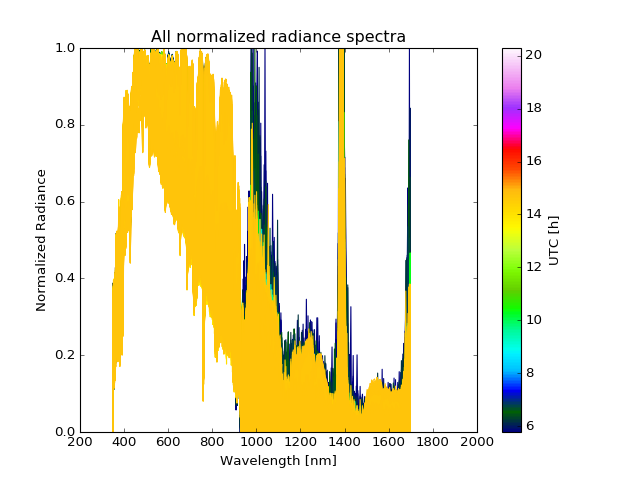

In [253]:
sp.plt_norm_zenrad(sr)